In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

from nltk.tag import pos_tag
from nltk import word_tokenize
from collections import Counter

# import textstat
# from lexicalrichness import LexicalRichness

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [4]:
df = pd.read_json("/content/thegioididong_rating_data_20220306.json")
print(df.shape)
df.isna().sum().sum()

(623, 30)


4503

In [5]:
def cover_data(df):
  content = []
  for i in range(df.shape[1]):
    for j in df[i]:
      content.append(j)
  return content

def take_data(content):
  result = []
  for i in content:
    if i == None:
      pass
    else:
      result.append(list(i.values()))
  return result
    


content_array = take_data(cover_data(df))
dataset = pd.DataFrame(np.array(content_array),columns=['username','comment','start'])






In [6]:
label = []
for i in dataset['start']:
  if  int(i) in [3,4,5]:
    label.append(1)
  else:
    label.append(0) 
dataset['label'] = np.array(label)


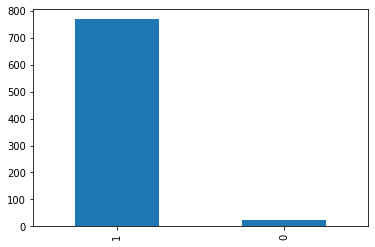

In [7]:
dataset.loc[dataset['comment'] == "",['comment','label']].label.value_counts().plot(kind='bar')

In [8]:
for i in range(dataset.shape[0]):
    if (dataset.loc[i,'comment'] == "" and dataset.loc[i,'label'] == 1):
      dataset.loc[i,'comment'] = 'positive'
    if (dataset.loc[i,'comment'] == "" and dataset.loc[i,'label'] == 0):
      dataset.loc[i,'comment'] = 'negative'
    else:
      pass




In [9]:
df = dataset[['comment','label']]
df

,comment,label
0,positive,1
1,positive,1
2,positive,1
3,positive,1
4,positive,1
...,...,...
14182,"cho hoi may tính bang Masstl tab 10,4 voi sams...",1
14183,nếu camera sau 8 trước 5 và cổng kết nối type ...,1
14184,dùng note 8 quen rồi mua thêm cái này xài đúng...,1
14185,"máy đẹp loa nghe to rỏ màn hình được , chỉ có ...",1


In [ ]:
!pip install textstat
!pip install lexicalrichness

In [10]:
acronyms_list = '''ship-vận chuyển
shop-cửa hàng
m-mình
mik-mình
ko-không
k-không
kh-không
khong-không
kg-không
khg-không
tl-trả lời
rep-trả lời
r-rồi
fb-facebook
face-faceook
thanks-cảm ơn
thank-cảm ơn
tks-cảm ơn
tk-cảm ơn
ok-tốt
oki-tốt
okie-tốt
sp-sản phẩm
dc-được
vs-với
đt-điện thoại
thjk-thích
thik-thích
qá-quá
trể-trễ
bgjo-bao giờ
h-giờ
qa-quá
dep-đẹp
xau-xấu
ib-nhắn tin
cute-dễ thương
sz-size
good-tốt
god-tốt
bt-bình thường
dc-được
đc-được
sd-sử dụng
ko-không
ios-hệ điều hành
h-giờ
vk-vợ
cung-cũng
oke-tốt
thk-cảm ơn
thnk-cảm ơn
series-bộ
ng-người
onl-online
ip-điện thoại
vsoi-với
trâu-tốt
edit-chỉnh sửa
xò-tốt
5sao-tốt
thơm-tốt
chs-chả hiểu sao
klq-không liên quan
clgt-cần lời giải thích
hum-hôm
dwc-được
wa-quá
wen-quên
lun-luôn
bun-buồn
k?-không
u-bạn
rui-rồi
chuối-dỡ
mí-mấy
hok-không
hk-không
hkg-không
hong-không
phở-đẹp
thx-cảm ơn
thks-cảm ơn
tx-cảm ơn
thaxu-cảm ơn
ntn-như thế nào
mog-mong
nhung-nhưng
chi-chỉ
co-có
mik-mình
minh-mình
mạ-mẹ
mensenge-tin nhắn
nhuwng-nhưng
sp-sản phẩm
cskh-chăm sóc khách hàng
wet-website
fix-sửa lỗi
lag-chậm
sida-dỡ
cùi-dỡ
mn-mọi người
bùn-buồn
fai-phải
hqua-hôm qua
bh-bảo hành
ttbh-trung tâm bảo hành
app-ứng dụng
mxh-mạng xã hội
cam-máy ảnh
came-máy ảnh
camera-máy ảnh
smattphone-điện thoại
fbk-mạng xã hội
qtv-quản trị viên
nt-như thế
fullbox-nguyên hộp
tgdd-thế giới di động
tgdđ-thế giới di động
dmx-điện máy xanh
dienmayxanh-điện máy xanh
e-em
ck-chồng
wer-website
thoi-thôi
thui-thôi
thuat-thuật
j-gì
sx-sản xuất
dk-đăng ký
đk-đăng ký
jb-mở mạng
cũngn-cũng
tuan-tuần
okê-tốt
vao-vào
bth-bình thường
đệm-đêm
ss-samsung
ad-quản trị viên
back-trở lại
bang-bằng
vê-về
nua-nữa
=-bằng
biet-biết
ny-người yêu
ma2-mà
chubg-chung
nhu-như
vi-vì
toi-tôi
sai-sài
nhan-nhận
xet-xét
moi-mọi
thu-thứ
game-trò chơi
china-trung quốc
test-kiểm tra
hiu-hiểu
'''.split("\n")
acronyms_list = [x.split("-") for x in acronyms_list]
acronyms_dict ={}
for i in range(len(acronyms_list)):
  try:
    acronyms_dict[acronyms_list[i][0]] = acronyms_list[i][1]
  except:
    pass

acronyms_dict

{'5sao': 'tốt',
 '=': 'bằng',
 'ad': 'quản trị viên',
 'app': 'ứng dụng',
 'back': 'trở lại',
 'bang': 'bằng',
 'bgjo': 'bao giờ',
 'bh': 'bảo hành',
 'biet': 'biết',
 'bt': 'bình thường',
 'bth': 'bình thường',
 'bun': 'buồn',
 'bùn': 'buồn',
 'cam': 'máy ảnh',
 'came': 'máy ảnh',
 'camera': 'máy ảnh',
 'chi': 'chỉ',
 'china': 'trung quốc',
 'chs': 'chả hiểu sao',
 'chubg': 'chung',
 'chuối': 'dỡ',
 'ck': 'chồng',
 'clgt': 'cần lời giải thích',
 'co': 'có',
 'cskh': 'chăm sóc khách hàng',
 'cung': 'cũng',
 'cute': 'dễ thương',
 'cùi': 'dỡ',
 'cũngn': 'cũng',
 'dc': 'được',
 'dep': 'đẹp',
 'dienmayxanh': 'điện máy xanh',
 'dk': 'đăng ký',
 'dmx': 'điện máy xanh',
 'dwc': 'được',
 'e': 'em',
 'edit': 'chỉnh sửa',
 'face': 'faceook',
 'fai': 'phải',
 'fb': 'facebook',
 'fbk': 'mạng xã hội',
 'fix': 'sửa lỗi',
 'fullbox': 'nguyên hộp',
 'game': 'trò chơi',
 'god': 'tốt',
 'good': 'tốt',
 'h': 'giờ',
 'hiu': 'hiểu',
 'hk': 'không',
 'hkg': 'không',
 'hok': 'không',
 'hong': 'không',
 'hqua

In [11]:
stop_words = '''a lô
a ha
ai
ai ai
ai nấy
ai đó
alô
amen
anh
anh ấy
ba
ba ba
ba bản
ba cùng
ba họ
ba ngày
ba ngôi
ba tăng
bao giờ
bao lâu
bao nhiêu
bao nả
bay biến
biết
biết bao
biết bao nhiêu
biết chắc
biết chừng nào
biết mình
biết mấy
biết thế
biết trước
biết việc
biết đâu
biết đâu chừng
biết đâu đấy
biết được
buổi
buổi làm
buổi mới
buổi ngày
buổi sớm
bà
bà ấy
bài
bài bác
bài bỏ
bài cái
bác
bán
bán cấp
bán dạ
bán thế
bây bẩy
bây chừ
bây giờ
bây nhiêu
bèn
béng
bên
bên bị
bên có
bên cạnh
bông
bước
bước khỏi
bước tới
bước đi
bạn
bản
bản bộ
bản riêng
bản thân
bản ý
bất chợt
bất cứ
bất giác
bất kì
bất kể
bất kỳ
bất luận
bất ngờ
bất nhược
bất quá
bất quá chỉ
bất thình lình
bất tử
bất đồ
bấy
bấy chầy
bấy chừ
bấy giờ
bấy lâu
bấy lâu nay
bấy nay
bấy nhiêu
bập bà bập bõm
bập bõm
bắt đầu
bắt đầu từ
bằng
bằng cứ
bằng không
bằng người
bằng nhau
bằng như
bằng nào
bằng nấy
bằng vào
bằng được
bằng ấy
bển
bệt
bị
bị chú
bị vì
bỏ
bỏ bà
bỏ cha
bỏ cuộc
bỏ không
bỏ lại
bỏ mình
bỏ mất
bỏ mẹ
bỏ nhỏ
bỏ quá
bỏ ra
bỏ riêng
bỏ việc
bỏ xa
bỗng
bỗng chốc
bỗng dưng
bỗng không
bỗng nhiên
bỗng nhưng
bỗng thấy
bỗng đâu
bộ
bộ thuộc
bộ điều
bội phần
bớ
bởi
bởi ai
bởi chưng
bởi nhưng
bởi sao
bởi thế
bởi thế cho nên
bởi tại
bởi vì
bởi vậy
bởi đâu
bức
cao
cao lâu
cao ráo
cao răng
cao sang
cao số
cao thấp
cao thế
cao xa
cha
cha chả
chao ôi
chia sẻ
chiếc
cho
cho biết
cho chắc
cho hay
cho nhau
cho nên
cho rằng
cho rồi
cho thấy
cho tin
cho tới
cho tới khi
cho về
cho ăn
cho đang
cho được
cho đến
cho đến khi
cho đến nỗi
choa
chu cha
chui cha
chung
chung cho
chung chung
chung cuộc
chung cục
chung nhau
chung qui
chung quy
chung quy lại
chung ái
chuyển
chuyển tự
chuyển đạt
chuyện
chuẩn bị
chành chạnh
chí chết
chính
chính bản
chính giữa
chính là
chính thị
chính điểm
chùn chùn
chùn chũn
chú
chú dẫn
chú khách
chú mày
chú mình
chúng
chúng mình
chúng ta
chúng tôi
chúng ông
chăn chắn
chăng
chăng chắc
chăng nữa
chơi
chơi họ
chưa
chưa bao giờ
chưa chắc
chưa có
chưa cần
chưa dùng
chưa dễ
chưa kể
chưa tính
chưa từng
chầm chập
chậc
chắc
chắc chắn
chắc dạ
chắc hẳn
chắc lòng
chắc người
chắc vào
chắc ăn
chẳng lẽ
chẳng những
chẳng nữa
chẳng phải
chết nỗi
chết thật
chết tiệt
chỉ
chỉ chính
chỉ có
chỉ là
chỉ tên
chỉn
chị
chị bộ
chị ấy
chịu
chịu chưa
chịu lời
chịu tốt
chịu ăn
chọn
chọn bên
chọn ra
chốc chốc
chớ
chớ chi
chớ gì
chớ không
chớ kể
chớ như
chợt
chợt nghe
chợt nhìn
chủn
chứ
chứ ai
chứ còn
chứ gì
chứ không
chứ không phải
chứ lại
chứ lị
chứ như
chứ sao
coi bộ
coi mòi
con
con con
con dạ
con nhà
con tính
cu cậu
cuối
cuối cùng
cuối điểm
cuốn
cuộc
càng
càng càng
càng hay
cá nhân
các
các cậu
cách
cách bức
cách không
cách nhau
cách đều
cái
cái gì
cái họ
cái đã
cái đó
cái ấy
câu hỏi
cây
cây nước
còn
còn như
còn nữa
còn thời gian
còn về
có
có ai
có chuyện
có chăng
có chăng là
có chứ
có cơ
có dễ
có họ
có khi
có ngày
có người
có nhiều
có nhà
có phải
có số
có tháng
có thế
có thể
có vẻ
có ý
có ăn
có điều
có điều kiện
có đáng
có đâu
có được
cóc khô
cô
cô mình
cô quả
cô tăng
cô ấy
công nhiên
cùng
cùng chung
cùng cực
cùng nhau
cùng tuổi
cùng tột
cùng với
cùng ăn
căn
căn cái
căn cắt
căn tính
cũng
cũng như
cũng nên
cũng thế
cũng vậy
cũng vậy thôi
cũng được
cơ
cơ chỉ
cơ chừng
cơ cùng
cơ dẫn
cơ hồ
cơ hội
cơ mà
cơn
cả
cả nghe
cả nghĩ
cả ngày
cả người
cả nhà
cả năm
cả thảy
cả thể
cả tin
cả ăn
cả đến
cảm thấy
cảm ơn
cấp
cấp số
cấp trực tiếp
cần
cần cấp
cần gì
cần số
cật lực
cật sức
cậu
cổ lai
cụ thể
cụ thể là
cụ thể như
của
của ngọt
của tin
cứ
cứ như
cứ việc
cứ điểm
cực lực
do
do vì
do vậy
do đó
duy
duy chỉ
duy có
dài
dài lời
dài ra
dành
dành dành
dào
dì
dù
dù cho
dù dì
dù gì
dù rằng
dù sao
dùng
dùng cho
dùng hết
dùng làm
dùng đến
dưới
dưới nước
dạ
dạ bán
dạ con
dạ dài
dạ dạ
dạ khách
dần dà
dần dần
dầu sao
dẫn
dẫu
dẫu mà
dẫu rằng
dẫu sao
dễ
dễ dùng
dễ gì
dễ khiến
dễ nghe
dễ ngươi
dễ như chơi
dễ sợ
dễ sử dụng
dễ thường
dễ thấy
dễ ăn
dễ đâu
dở chừng
dữ
dữ cách
em
em em
giá trị
giá trị thực tế
giảm
giảm chính
giảm thấp
giảm thế
giống
giống người
giống nhau
giống như
giờ
giờ lâu
giờ này
giờ đi
giờ đây
giờ đến
giữ
giữ lấy
giữ ý
giữa
giữa lúc
gây
gây cho
gây giống
gây ra
gây thêm
gì
gì gì
gì đó
gần
gần bên
gần hết
gần ngày
gần như
gần xa
gần đây
gần đến
gặp
gặp khó khăn
gặp phải
gồm
hay
hay biết
hay hay
hay không
hay là
hay làm
hay nhỉ
hay nói
hay sao
hay tin
hay đâu
hiểu
hiện nay
hiện tại
hoàn toàn
hoặc
hoặc là
hãy
hãy còn
hơn
hơn cả
hơn hết
hơn là
hơn nữa
hơn trước
hầu hết
hết
hết chuyện
hết cả
hết của
hết nói
hết ráo
hết rồi
hết ý
họ
họ gần
họ xa
hỏi
hỏi lại
hỏi xem
hỏi xin
hỗ trợ
khi
khi khác
khi không
khi nào
khi nên
khi trước
khiến
khoảng
khoảng cách
khoảng không
khá
khá tốt
khác
khác gì
khác khác
khác nhau
khác nào
khác thường
khác xa
khách
khó
khó biết
khó chơi
khó khăn
khó làm
khó mở
khó nghe
khó nghĩ
khó nói
khó thấy
khó tránh
không
không ai
không bao giờ
không bao lâu
không biết
không bán
không chỉ
không còn
không có
không có gì
không cùng
không cần
không cứ
không dùng
không gì
không hay
không khỏi
không kể
không ngoài
không nhận
không những
không phải
không phải không
không thể
không tính
không điều kiện
không được
không đầy
không để
khẳng định
khỏi
khỏi nói
kể
kể cả
kể như
kể tới
kể từ
liên quan
loại
loại từ
luôn
luôn cả
luôn luôn
luôn tay
là
là cùng
là là
là nhiều
là phải
là thế nào
là vì
là ít
làm
làm bằng
làm cho
làm dần dần
làm gì
làm lòng
làm lại
làm lấy
làm mất
làm ngay
làm như
làm nên
làm ra
làm riêng
làm sao
làm theo
làm thế nào
làm tin
làm tôi
làm tăng
làm tại
làm tắp lự
làm vì
làm đúng
làm được
lâu
lâu các
lâu lâu
lâu nay
lâu ngày
lên
lên cao
lên cơn
lên mạnh
lên ngôi
lên nước
lên số
lên xuống
lên đến
lòng
lòng không
lúc
lúc khác
lúc lâu
lúc nào
lúc này
lúc sáng
lúc trước
lúc đi
lúc đó
lúc đến
lúc ấy
lý do
lượng
lượng cả
lượng số
lượng từ
lại
lại bộ
lại cái
lại còn
lại giống
lại làm
lại người
lại nói
lại nữa
lại quả
lại thôi
lại ăn
lại đây
lấy
lấy có
lấy cả
lấy giống
lấy làm
lấy lý do
lấy lại
lấy ra
lấy ráo
lấy sau
lấy số
lấy thêm
lấy thế
lấy vào
lấy xuống
lấy được
lấy để
lần
lần khác
lần lần
lần nào
lần này
lần sang
lần sau
lần theo
lần trước
lần tìm
lớn
lớn lên
lớn nhỏ
lời
lời chú
lời nói
mang
mang lại
mang mang
mang nặng
mang về
muốn
mà
mà cả
mà không
mà lại
mà thôi
mà vẫn
mình
mạnh
mất
mất còn
mọi
mọi giờ
mọi khi
mọi lúc
mọi người
mọi nơi
mọi sự
mọi thứ
mọi việc
mối
mỗi
mỗi lúc
mỗi lần
mỗi một
mỗi ngày
mỗi người
một
một cách
một cơn
một khi
một lúc
một số
một vài
một ít
mới
mới hay
mới rồi
mới đây
mở
mở mang
mở nước
mở ra
mợ
mức
nay
ngay
ngay bây giờ
ngay cả
ngay khi
ngay khi đến
ngay lúc
ngay lúc này
ngay lập tức
ngay thật
ngay tức khắc
ngay tức thì
ngay từ
nghe
nghe chừng
nghe hiểu
nghe không
nghe lại
nghe nhìn
nghe như
nghe nói
nghe ra
nghe rõ
nghe thấy
nghe tin
nghe trực tiếp
nghe đâu
nghe đâu như
nghe được
nghen
nghiễm nhiên
nghĩ
nghĩ lại
nghĩ ra
nghĩ tới
nghĩ xa
nghĩ đến
nghỉm
ngoài
ngoài này
ngoài ra
ngoài xa
ngoải
nguồn
ngày
ngày càng
ngày cấp
ngày giờ
ngày ngày
ngày nào
ngày này
ngày nọ
ngày qua
ngày rày
ngày tháng
ngày xưa
ngày xửa
ngày đến
ngày ấy
ngôi
ngôi nhà
ngôi thứ
ngõ hầu
ngăn ngắt
ngươi
người
người hỏi
người khác
người khách
người mình
người nghe
người người
người nhận
ngọn
ngọn nguồn
ngọt
ngồi
ngồi bệt
ngồi không
ngồi sau
ngồi trệt
ngộ nhỡ
nhanh
nhanh lên
nhanh tay
nhau
nhiên hậu
nhiều
nhiều ít
nhiệt liệt
nhung nhăng
nhà
nhà chung
nhà khó
nhà làm
nhà ngoài
nhà ngươi
nhà tôi
nhà việc
nhân dịp
nhân tiện
nhé
nhìn
nhìn chung
nhìn lại
nhìn nhận
nhìn theo
nhìn thấy
nhìn xuống
nhóm
nhón nhén
như
như ai
như chơi
như không
như là
như nhau
như quả
như sau
như thường
như thế
như thế nào
như thể
như trên
như trước
như tuồng
như vậy
như ý
nhưng
nhưng mà
nhược bằng
nhất
nhất loạt
nhất luật
nhất là
nhất mực
nhất nhất
nhất quyết
nhất sinh
nhất thiết
nhất thì
nhất tâm
nhất tề
nhất đán
nhất định
nhận
nhận biết
nhận họ
nhận làm
nhận nhau
nhận ra
nhận thấy
nhận việc
nhận được
nhằm
nhằm khi
nhằm lúc
nhằm vào
nhằm để
nhỉ
nhỏ
nhỏ người
nhớ
nhớ bập bõm
nhớ lại
nhớ lấy
nhớ ra
nhờ
nhờ chuyển
nhờ có
nhờ nhờ
nhờ đó
nhỡ ra
những
những ai
những khi
những là
những lúc
những muốn
những như
nào
nào cũng
nào hay
nào là
nào phải
nào đâu
nào đó
này
này nọ
nên
nên chi
nên chăng
nên làm
nên người
nên tránh
nó
nóc
nói
nói bông
nói chung
nói khó
nói là
nói lên
nói lại
nói nhỏ
nói phải
nói qua
nói ra
nói riêng
nói rõ
nói thêm
nói thật
nói toẹt
nói trước
nói tốt
nói với
nói xa
nói ý
nói đến
nói đủ
năm
năm tháng
nơi
nơi nơi
nước
nước bài
nước cùng
nước lên
nước nặng
nước quả
nước xuống
nước ăn
nước đến
nấy
nặng
nặng căn
nặng mình
nặng về
nếu
nếu có
nếu cần
nếu không
nếu mà
nếu như
nếu thế
nếu vậy
nếu được
nền
nọ
nớ
nức nở
nữa
nữa khi
nữa là
nữa rồi
oai oái
oái
pho
phè
phè phè
phía
phía bên
phía bạn
phía dưới
phía sau
phía trong
phía trên
phía trước
phóc
phót
phù hợp
phăn phắt
phương chi
phải
phải biết
phải chi
phải chăng
phải cách
phải cái
phải giờ
phải khi
phải không
phải lại
phải lời
phải người
phải như
phải rồi
phải tay
phần
phần lớn
phần nhiều
phần nào
phần sau
phần việc
phắt
phỉ phui
phỏng
phỏng như
phỏng nước
phỏng theo
phỏng tính
phốc
phụt
phứt
qua
qua chuyện
qua khỏi
qua lại
qua lần
qua ngày
qua tay
qua thì
qua đi
quan trọng
quan trọng vấn đề
quan tâm
quay
quay bước
quay lại
quay số
quay đi
quá
quá bán
quá bộ
quá giờ
quá lời
quá mức
quá nhiều
quá tay
quá thì
quá tin
quá trình
quá tuổi
quá đáng
quá ư
quả
quả là
quả thật
quả thế
quả vậy
quận
ra
ra bài
ra bộ
ra chơi
ra gì
ra lại
ra lời
ra ngôi
ra người
ra sao
ra tay
ra vào
ra ý
ra điều
ra đây
ren rén
riu ríu
riêng
riêng từng
riệt
rày
ráo
ráo cả
ráo nước
ráo trọi
rén
rén bước
rích
rón rén
rõ
rõ là
rõ thật
rút cục
răng
răng răng
rất
rất lâu
rằng
rằng là
rốt cuộc
rốt cục
rồi
rồi nữa
rồi ra
rồi sao
rồi sau
rồi tay
rồi thì
rồi xem
rồi đây
rứa
sa sả
sang
sang năm
sang sáng
sang tay
sao
sao bản
sao bằng
sao cho
sao vậy
sao đang
sau
sau chót
sau cuối
sau cùng
sau hết
sau này
sau nữa
sau sau
sau đây
sau đó
so
so với
song le
suýt
suýt nữa
sáng
sáng ngày
sáng rõ
sáng thế
sáng ý
sì
sì sì
sất
sắp
sắp đặt
sẽ
sẽ biết
sẽ hay
số
số cho biết
số cụ thể
số loại
số là
số người
số phần
số thiếu
sốt sột
sớm
sớm ngày
sở dĩ
sử dụng
sự
sự thế
sự việc
tanh
tanh tanh
tay
tay quay
tha hồ
tha hồ chơi
tha hồ ăn
than ôi
thanh
thanh ba
thanh chuyển
thanh không
thanh thanh
thanh tính
thanh điều kiện
thanh điểm
thay đổi
thay đổi tình trạng
theo
theo bước
theo như
theo tin
thi thoảng
thiếu
thiếu gì
thiếu điểm
thoạt
thoạt nghe
thoạt nhiên
thoắt
thuần
thuần ái
thuộc
thuộc bài
thuộc cách
thuộc lại
thuộc từ
thà
thà là
thà rằng
thành ra
thành thử
thái quá
tháng
tháng ngày
tháng năm
tháng tháng
thêm
thêm chuyện
thêm giờ
thêm vào
thì
thì giờ
thì là
thì phải
thì ra
thì thôi
thình lình
thích
thích cứ
thích thuộc
thích tự
thích ý
thím
thôi
thôi việc
thúng thắng
thương ôi
thường
thường bị
thường hay
thường khi
thường số
thường sự
thường thôi
thường thường
thường tính
thường tại
thường xuất hiện
thường đến
thảo hèn
thảo nào
thấp
thấp cơ
thấp thỏm
thấp xuống
thấy
thấy tháng
thẩy
thậm
thậm chí
thậm cấp
thậm từ
thật
thật chắc
thật là
thật lực
thật quả
thật ra
thật sự
thật thà
thật tốt
thật vậy
thế
thế chuẩn bị
thế là
thế lại
thế mà
thế nào
thế nên
thế ra
thế sự
thế thì
thế thôi
thế thường
thế thế
thế à
thế đó
thếch
thỉnh thoảng
thỏm
thốc
thốc tháo
thốt
thốt nhiên
thốt nói
thốt thôi
thộc
thời gian
thời gian sử dụng
thời gian tính
thời điểm
thục mạng
thứ
thứ bản
thứ đến
thửa
thực hiện
thực hiện đúng
thực ra
thực sự
thực tế
thực vậy
tin
tin thêm
tin vào
tiếp theo
tiếp tục
tiếp đó
tiện thể
toà
toé khói
toẹt
trong
trong khi
trong lúc
trong mình
trong ngoài
trong này
trong số
trong vùng
trong đó
trong ấy
tránh
tránh khỏi
tránh ra
tránh tình trạng
tránh xa
trên
trên bộ
trên dưới
trước
trước hết
trước khi
trước kia
trước nay
trước ngày
trước nhất
trước sau
trước tiên
trước tuổi
trước đây
trước đó
trả
trả của
trả lại
trả ngay
trả trước
trếu tráo
trển
trệt
trệu trạo
trỏng
trời đất ơi
trở thành
trừ phi
trực tiếp
trực tiếp làm
tuy
tuy có
tuy là
tuy nhiên
tuy rằng
tuy thế
tuy vậy
tuy đã
tuyệt nhiên
tuần tự
tuốt luốt
tuốt tuồn tuột
tuốt tuột
tuổi
tuổi cả
tuổi tôi
tà tà
tên
tên chính
tên cái
tên họ
tên tự
tênh
tênh tênh
tìm
tìm bạn
tìm cách
tìm hiểu
tìm ra
tìm việc
tình trạng
tính
tính cách
tính căn
tính người
tính phỏng
tính từ
tít mù
tò te
tôi
tôi con
tông tốc
tù tì
tăm tắp
tăng
tăng chúng
tăng cấp
tăng giảm
tăng thêm
tăng thế
tại
tại lòng
tại nơi
tại sao
tại tôi
tại vì
tại đâu
tại đây
tại đó
tạo
tạo cơ hội
tạo nên
tạo ra
tạo ý
tạo điều kiện
tấm
tấm bản
tấm các
tấn
tấn tới
tất cả
tất cả bao nhiêu
tất thảy
tất tần tật
tất tật
tập trung
tắp
tắp lự
tắp tắp
tọt
tỏ ra
tỏ vẻ
tốc tả
tối ư
tốt
tốt bạn
tốt bộ
tốt hơn
tốt mối
tốt ngày
tột
tột cùng
tớ
tới
tới gần
tới mức
tới nơi
tới thì
tức thì
tức tốc
từ
từ căn
từ giờ
từ khi
từ loại
từ nay
từ thế
từ tính
từ tại
từ từ
từ ái
từ điều
từ đó
từ ấy
từng
từng cái
từng giờ
từng nhà
từng phần
từng thời gian
từng đơn vị
từng ấy
tự
tự cao
tự khi
tự lượng
tự tính
tự tạo
tự vì
tự ý
tự ăn
tựu trung
veo
veo veo
việc
việc gì
vung thiên địa
vung tàn tán
vung tán tàn
và
vài
vài ba
vài người
vài nhà
vài nơi
vài tên
vài điều
vào
vào gặp
vào khoảng
vào lúc
vào vùng
vào đến
vâng
vâng chịu
vâng dạ
vâng vâng
vâng ý
vèo
vèo vèo
vì
vì chưng
vì rằng
vì sao
vì thế
vì vậy
ví bằng
ví dù
ví phỏng
ví thử
vô hình trung
vô kể
vô luận
vô vàn
vùng
vùng lên
vùng nước
văng tê
vượt
vượt khỏi
vượt quá
vạn nhất
vả chăng
vả lại
vấn đề
vấn đề quan trọng
vẫn
vẫn thế
vậy
vậy là
vậy mà
vậy nên
vậy ra
vậy thì
vậy ư
về
về không
về nước
về phần
về sau
về tay
vị trí
vị tất
vốn dĩ
với
với lại
với nhau
vở
vụt
vừa
vừa khi
vừa lúc
vừa mới
vừa qua
vừa rồi
vừa vừa
xa
xa cách
xa gần
xa nhà
xa tanh
xa tắp
xa xa
xa xả
xem
xem lại
xem ra
xem số
xin
xin gặp
xin vâng
xiết bao
xon xón
xoành xoạch
xoét
xoẳn
xoẹt
xuất hiện
xuất kì bất ý
xuất kỳ bất ý
xuể
xuống
xăm xúi
xăm xăm
xăm xắm
xảy ra
xềnh xệch
xệp
xử lý
yêu cầu
à
à này
à ơi
ào
ào vào
ào ào
á
á à
ái
ái chà
ái dà
áng
áng như
âu là
ít
ít biết
ít có
ít hơn
ít khi
ít lâu
ít nhiều
ít nhất
ít nữa
ít quá
ít ra
ít thôi
ít thấy
ô hay
ô hô
ô kê
ô kìa
ôi chao
ôi thôi
ông
ông nhỏ
ông tạo
ông từ
ông ấy
ông ổng
úi
úi chà
úi dào
ý
ý chừng
ý da
ý hoặc
ăn
ăn chung
ăn chắc
ăn chịu
ăn cuộc
ăn hết
ăn hỏi
ăn làm
ăn người
ăn ngồi
ăn quá
ăn riêng
ăn sáng
ăn tay
ăn trên
ăn về
đang
đang tay
đang thì
điều
điều gì
điều kiện
điểm
điểm chính
điểm gặp
điểm đầu tiên
đành đạch
đáng
đáng kể
đáng lí
đáng lý
đáng lẽ
đáng số
đánh giá
đánh đùng
đáo để
đâu
đâu có
đâu cũng
đâu như
đâu nào
đâu phải
đâu đâu
đâu đây
đâu đó
đây
đây này
đây rồi
đây đó
đã
đã hay
đã không
đã là
đã lâu
đã thế
đã vậy
đã đủ
đó
đó đây
đúng
đúng ngày
đúng ra
đúng tuổi
đúng với
đơn vị
đưa
đưa cho
đưa chuyện
đưa em
đưa ra
đưa tay
đưa tin
đưa tới
đưa vào
đưa về
đưa xuống
đưa đến
được
được cái
được lời
được nước
được tin
đại loại
đại nhân
đại phàm
đại để
đạt
đảm bảo
đầu tiên
đầy
đầy năm
đầy phè
đầy tuổi
đặc biệt
đặt
đặt làm
đặt mình
đặt mức
đặt ra
đặt trước
đặt để
đến
đến bao giờ
đến cùng
đến cùng cực
đến cả
đến giờ
đến gần
đến hay
đến khi
đến lúc
đến lời
đến nay
đến ngày
đến nơi
đến nỗi
đến thì
đến thế
đến tuổi
đến xem
đến điều
đến đâu
đều
đều bước
đều nhau
đều đều
để
để cho
để giống
để không
để lòng
để lại
để mà
để phần
để được
để đến nỗi
đối với
đồng thời
đủ
đủ dùng
đủ nơi
đủ số
đủ điều
đủ điểm
ơ
ơ hay
ơ kìa
ơi
ơi là
ư
ạ
ạ ơi
ấy
ấy là
ầu ơ
ắt
ắt hẳn
ắt là
ắt phải
ắt thật
ối dào
ối giời
ối giời ơi
ồ
ồ ồ
ổng
ớ
ớ này
ờ
ờ ờ
ở
ở lại
ở như
ở nhờ
ở năm
ở trên
ở vào
ở đây
ở đó
ở được
ủa
ứ hự
ứ ừ
ừ
ừ nhé
ừ thì
ừ ào
ừ ừ
ử
1'''.split("\n")


In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
comment_corpus = []
for i in range(len(df['comment'])):
  comment_corpus.append(re.sub('\W+'," ", df['comment'][i]).split(" "))


  



In [14]:
for i in range(len(comment_corpus)):
  for j in range(len(comment_corpus[i])):
    if comment_corpus[i][j] in acronyms_dict.keys():
      comment_corpus[i][j] = acronyms_dict[comment_corpus[i][j]]
comment_acronyms = []
for i in range(len(comment_corpus)):
  temp = ""
  for j in range(len(comment_corpus[i])):
    temp += comment_corpus[i][j] +" "
  comment_acronyms.append(temp)





In [15]:
!git clone https://github.com/Sudo-VP/Vietnamese-Word-Segmentation-Python

Cloning into 'Vietnamese-Word-Segmentation-Python'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 118 (delta 33), reused 96 (delta 16), pack-reused 0
Receiving objects: 100% (118/118), 905.21 KiB | 17.41 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [16]:
cd /content/Vietnamese-Word-Segmentation-Python

/content/Vietnamese-Word-Segmentation-Python


In [17]:
!python setup.py install


running install
running bdist_egg
running egg_info
writing vws.egg-info/PKG-INFO
writing dependency_links to vws.egg-info/dependency_links.txt
writing top-level names to vws.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'vws.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/src
copying ./src/Utils.py -> build/lib/src
copying ./src/RDRSegmenter.py -> build/lib/src
copying ./src/DataPreprocessor.py -> build/lib/src
copying ./src/Node.py -> build/lib/src
copying ./src/Vocabulary.py -> build/lib/src
copying ./src/__init__.py -> build/lib/src
copying ./src/Tokenizer.py -> build/lib/src
copying ./src/FWObject.py -> build/lib/src
copying ./src/WordTag.py -> build/lib/src
creating build/lib/vws
copying ./vws/Utils.py -> build/lib/vws
copying ./vws/RDRSegmenter.py -> build/lib/vws
copying ./vws/DataPreprocessor.py -> build/lib/vws
copying .

In [18]:
from vws import RDRSegmenter, Tokenizer
rdrsegment = RDRSegmenter.RDRSegmenter()
tokenizer = Tokenizer.Tokenizer()
for i in range(len(comment_acronyms)):
  comment_acronyms[i] = rdrsegment.segmentRawSentences(tokenizer,comment_acronyms[i])


In [ ]:
for i in range(len(stop_words)):
  for j in range(len(stop_words[i])):
    if stop_words[i][j] == " ":
      stop_words[i]=stop_words[i].replace(" ","_")
  
stop_words

In [20]:
comment_stop_word = []
for i in comment_acronyms:
  comment_stop_word.append([x for x in i.split(" ") if x not in stop_words])


In [ ]:
comment = []
for i in range(len(comment_stop_word)):
  temp = ""
  for j in range(len(comment_stop_word[i])):
    temp +=comment_stop_word[i][j].lower() +" "
  comment.append(temp)
comment

In [ ]:
label = df['label']
label

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X_train, X_test, y_train, y_test = train_test_split(comment, label, test_size=0.2, random_state=42)

In [24]:
with open('train.txt', 'w') as fp:
    for x, y in zip(X_train, y_train):
        fp.write('{} {}\n'.format(y, x))
 
with open('test.txt', 'w') as fp:
    for x, y in zip(X_test, y_test):
        fp.write('{} {}\n'.format(y, x))

In [25]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print(list(label_encoder.classes_), '\n')
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

[0, 1] 



In [28]:
import pickle
import time
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
 
start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.8,
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())
                    ])
text_clf = text_clf.fit(X_train, y_train)
 
train_time = time.time() - start_time
print('Done training Naive Bayes in', train_time, 'seconds.')
 
# Save model
pickle.dump(text_clf, open(os.path.join('/content/drive/MyDrive/variables', "naive_bayes.pkl"), 'wb'))

Done training Naive Bayes in 0.23176169395446777 seconds.


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
from sklearn.svm import SVC
 
start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.8,
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()),
                     ('clf', SVC(gamma='scale'))
                    ])
text_clf = text_clf.fit(X_train, y_train)
 
train_time = time.time() - start_time
print('Done training SVM in', train_time, 'seconds.')
 
# Save model
pickle.dump(text_clf, open(os.path.join('/content/drive/MyDrive/variables', "svm.pkl"), 'wb'))

Done training SVM in 15.805007219314575 seconds.


In [30]:
import numpy as np
# Naive Bayes
model = pickle.load(open(os.path.join('/content/drive/MyDrive/variables',"naive_bayes.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('Naive Bayes, Accuracy =', np.mean(y_pred == y_test))
 

# SVM
model = pickle.load(open(os.path.join('/content/drive/MyDrive/variables',"svm.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('SVM, Accuracy =', np.mean(y_pred == y_test))

    


Naive Bayes, Accuracy = 0.8164200140944327
SVM, Accuracy = 0.8731501057082452


list

In [46]:
text = dataset['comment'][1800]
text

'Mua dùng được hơn nửa tháng, trải nghiệm oke, pin dùng được lâu ,nhưng có lúc chỉ nghe nhạc thôi mà điện thoại cũng nóng'

In [54]:
def preprocessing(text = ""):
  text = re.sub('\W+'," ", text).split(" ")
  for i in range(len(text)):
      if text[i] in acronyms_dict.keys():
        text[i] = acronyms_dict[text[i]]

  text_acronyms = []
  temp = ""
  for i in range(len(text)):
    temp += text[i] +" "
  text_acronyms.append(temp)


  from vws import RDRSegmenter, Tokenizer
  rdrsegment = RDRSegmenter.RDRSegmenter()
  tokenizer = Tokenizer.Tokenizer()
  text_segment = rdrsegment.segmentRawSentences(tokenizer,text_acronyms[0])


  text_stop_word = [x for x in text_segment.split(" ") if x not in stop_words]

  text_preprocessed = []
  temp = ""
  for i in range(len(text_stop_word)):
    temp +=text_stop_word[i].lower() +" "
  text_preprocessed.append(temp)
  return text_preprocessed

new_text = preprocessing(text = text)



result = model.predict(new_text)
result
  

array([1])